# Facebook Message Analyzer



<b> Current Features For a Given Chat: </b>
<ul> 
    <li> Number of Messages Sent </li> 
    <li> Messages Sent Over Time </li> 
    <li> Average Word Count </li>
</ul>

Written by Jeffrey He in 2018

In [2]:
import csv
import os
import json
import numpy as np
import pylab as pl
import datetime

CURRENT_DIRECTORY = os.getcwd()
NUMBER_TO_ANALYZE = 5000
MESSAGE_THRESHOLD = 1000

In [10]:
def get_json_data(chat):
    json_location = CURRENT_DIRECTORY + "/messages/" + chat + "/message.json"
    with open(json_location) as json_file:
        json_data = json.load(json_file)
        return json_data

In [11]:
chats = os.listdir(CURRENT_DIRECTORY + "/messages")[:NUMBER_TO_ANALYZE]
sorted_chats = []
final_data_messages = {}
final_data_times = {}
final_data_words = {}
invalid_message_count = 0

In [12]:
print('Analyzing ' + str(min(NUMBER_TO_ANALYZE, len(chats))) + ' chats...')

for chat in chats:
    if chat != "stickers_used":
        json_data = get_json_data(chat)
        messages = json_data["messages"]
        if len(messages) >= MESSAGE_THRESHOLD:
            sorted_chats.append((len(messages), chat, messages))

sorted_chats.sort(reverse=True)

print('Finished processing chats...')

Analyzing 2565 chats...
Finished processing chats...


In [14]:
for i, (messages, chat, messages) in enumerate(sorted_chats):
    number_messages = {}
    person_to_times = {}
    number_words = {}

    print(str(i) + " - " + str(len(messages)) + " messages - " + str(chat))

    for message in messages:
        try:
            name = message["sender_name"]
            time = message["timestamp_ms"]
            message_content = message["content"]

            number_messages[name] = number_messages.get(name, 0)
            number_messages[name] += 1

            person_to_times[name] = person_to_times.get(name, [])
            person_to_times[name].append(datetime.datetime.fromtimestamp(time/1000.0))

            number_words[name] = number_words.get(name, [])
            number_words[name].append(len(message_content.split()))
        except KeyError:
            # happens for special cases like users who deactivated, unfriended, blocked
            invalid_message_count += 1

    final_data_messages[i] = number_messages
    final_data_times[i] = person_to_times
    final_data_words[i] = number_words

print('Found ' + str(invalid_message_count) + ' invalid messages...')
print('Found ' + str(len(sorted_chats)) + ' chats with ' + str(MESSAGE_THRESHOLD) + ' messages or more')

0 - 74285 messages - NatashaChong_3df35973da
1 - 64865 messages - LaurenChung_42684362e1
2 - 58078 messages - ChristineJou_ca5afa3864
3 - 52998 messages - CharlotteChui_1f6a11adbf
4 - 40742 messages - ChangwookShim_0a81be035a
5 - 40115 messages - SEAMC_f6bb6f0ca8
6 - 35930 messages - FacebookUser_8dd47febec
7 - 30178 messages - SaritaDamaraju_dc83dc2487
8 - 25757 messages - YashvardhanMehraBardoloi_0cd6900a6b
9 - 25559 messages - AnantMajumdar_b1c8afe352
10 - 22486 messages - NatashaChyi_c4ea8c481b
11 - 21536 messages - MeganDiehl_7704aa3f4f
12 - 20685 messages - AndrewKao_acee5707cf
13 - 20295 messages - RyanFu_ad76b002ef
14 - 19054 messages - JessicaHuang_04a1ce67ae
15 - 14838 messages - IvyTse_cb16cd4c77
16 - 13767 messages - HKISSenateExCo20152016_d3e49db519
17 - 13492 messages - JasonLeung_1797c82265
18 - 10324 messages - KaiTrepka_680510f579
19 - 10142 messages - AmyTan_d2b0a6219c
20 - 9916 messages - PaulNebres_25c5bb37e0
21 - 9557 messages - MadisonPassamonte_76d0a95688
22 - 84

In [25]:
def plot_num_messages(chat_number):
    plotted_data = final_data_messages[chat_number]
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Number of Messages Sent')
    pl.tight_layout()
    pl.show()
    
def plot_histogram_time(chat_number):
    person_to_times = final_data_times[chat_number]
    pl.xlabel('Time')
    pl.ylabel('Number of Messages')
    pl.title('# of Messages Over Time')
    colors = ['b', 'r', 'c', 'm', 'y', 'k', 'w', 'g']
    for i , person in enumerate(person_to_times):
        plotted_data = person_to_times[person]
        pl.hist(plotted_data, 100, alpha=0.3, label=person, facecolor=colors[i % len(colors)])
    pl.tight_layout()
    pl.legend()
    pl.xticks(rotation=90)
    pl.show()

def plot_histogram_words(chat_number):
    temp = {}
    for person in final_data_words[chat_number]:
        temp[person] = np.average(final_data_words[chat_number][person])
    plotted_data = temp
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Average Word Count')
    pl.tight_layout()
    pl.show()
    
def plot(chat_number):
    plot_num_messages(chat_number)
    plot_histogram_time(chat_number)
    plot_histogram_words(chat_number)

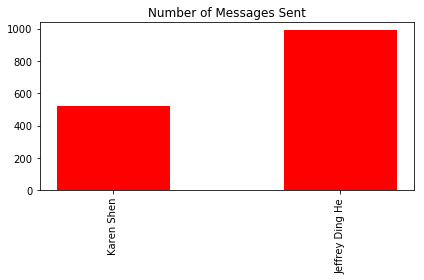

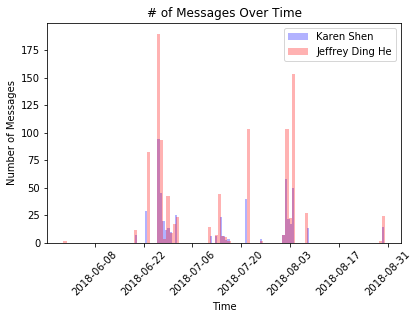

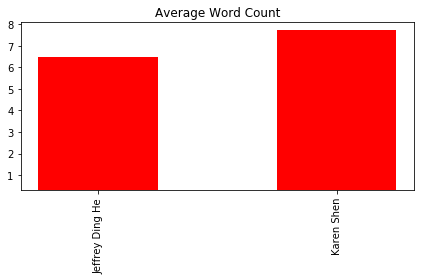

In [26]:
plot(126)